# UT6 -Computer Vision- Face detection (Ejemplo 6-8)

Detección de rostros utilizando algoritmos de OpenCV,  Redes Convolucionales (Dlib).

Ejecutar en Colab.

Requisitos : Opencv, dlib,people1.jpg,people2.jpg

## OpenCV

### Loading the image

In [ ]:
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
image = cv2.imread('/content/drive/MyDrive/ComputerVision/Images/people1.jpg')

In [ ]:
image.shape

In [ ]:
#cv2.imshow(image)  #(enlocal)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
image = cv2.resize(image, (800, 600))
image.shape

In [ ]:
cv2_imshow(image)

La detección solo funciona en imágenes en escala de grises. Por lo tanto, es importante convertir la imagen en color a escala de grises.

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

In [ ]:
image_gray.shape

### 1.- Detecting faces con OpenCV (Haarcascade)

En comparación con otros, OpenCV es el detector de cara más ligero. La popular herramienta de procesamiento de imágenes utiliza un algoritmo de cascada de haar que no se basa en técnicas de aprendizaje profundo. Por eso es rápido, pero su rendimiento es relativamente bajo. Para que OpenCV funcione correctamente, se requieren imágenes frontales. Además, su rendimiento de detección ocular es promedio. Esto causa problemas de alineación.

Más Información https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

In [ ]:
from urllib.request import urlretrieve

url = ('https://raw.githubusercontent.com/kipr/opencv/refs/heads/master/data/haarcascades/haarcascade_frontalface_default.xml')

urlretrieve(url=url, filename='/content/haarcascade_frontalface_default.xml')

In [ ]:
#face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/ComputerVision/Cascades/haarcascade_frontalface_default.xml')
face_detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
detections = face_detector.detectMultiScale(image_gray)
detections

In [ ]:
len(detections)

In [ ]:
for (x, y, w, h) in detections:
  print(x, y, w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 1)
cv2_imshow(image)

### Haarcascade parameters

La función detectMultiScale se utiliza para detectar las caras. Se necesitan 3 argumentos:

faces = face_cascade.detectMultiScale(imagengris, 1.1, 3)

    Imagen de entrada
    ScaleFactor
    MinNeighbours

ScaleFactor especifica cuánto se reduce el tamaño de la imagen con cada escala.

MinNeighbours especifica cuántos vecinos debe tener cada rectángulo candidato para darlo como bueno.

Más info: (https://omes-va.com/deteccion-de-rostros-con-haar-cascades-python-opencv)

In [ ]:
image = cv2.imread('/content/drive/MyDrive/ComputerVision/Images/people1.jpg')
image = cv2.resize(image, (800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.09)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 3)
cv2_imshow(image)

In [ ]:
image = cv2.imread('/content/drive/MyDrive/ComputerVision/Images/people2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=7,
                                            minSize=(20,20), maxSize=(100,100))
for (x, y, w, h) in detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

### Eye detection

Cargamos el detector de ojos haarcascade_eye.xml

In [ ]:
url = ('https://raw.githubusercontent.com/austinjoyal/haar-cascade-files/refs/heads/master/haarcascade_eye.xml')

urlretrieve(url=url, filename='/content/haarcascade_eye.xml')
eye_detector = cv2.CascadeClassifier('/content/haarcascade_eye.xml')


In [ ]:
image = cv2.imread('/content/drive/MyDrive/ComputerVision/Images/people1.jpg')
#image = cv2.resize(image, (800, 600))
print(image.shape)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.3, minSize = (30,30))
for (x, y, w, h) in face_detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor = 1.1, minNeighbors=10, maxSize=(70,70))
for (x, y, w, h) in eye_detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

cv2_imshow(image)

## 2.- Detecting faces con Dlib

Este detector utiliza un algoritmo HOG internamente (Histogram of Oriented Gradients) perteneciente a la libreria multiproposito Dlib. Por lo tanto, como OpenCV, no se basa en el aprendizaje profundo. Aún así, tiene puntuaciones de detección y alineación relativamente altas.


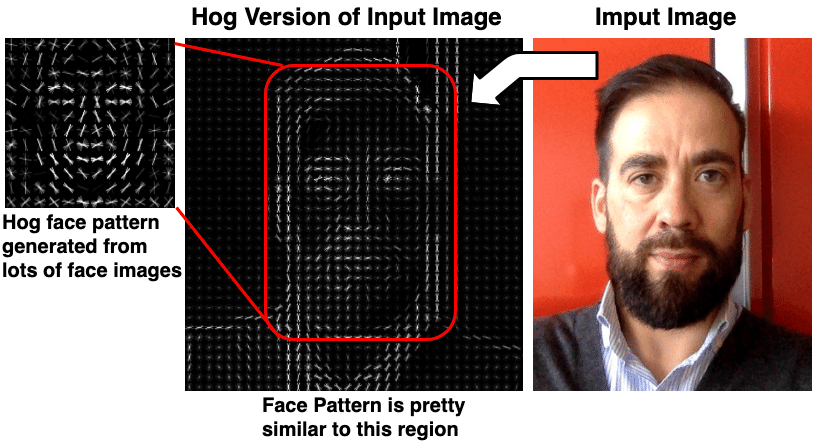

In [ ]:
import dlib

### Detecting faces with HOG

In [ ]:
image = cv2.imread('/content/drive/MyDrive/ComputerVision/Images/people2.jpg')
cv2_imshow(image)

In [ ]:
face_detector_hog = dlib.get_frontal_face_detector()

In [ ]:
detections = face_detector_hog(image, 1)

In [ ]:
detections, len(detections)

In [ ]:
for face in detections:
  #print(face)
  #print(face.left())
  #print(face.top())
  #print(face.right())
  #print(face.bottom())
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

## 3.- Detecting faces with CNN (Convolutional Neural Networks) con DeepFace

In [ ]:
!pip install -q deepface

In [ ]:
#https://github.com/serengil/deepface/blob/master/tests/test_extract_faces.py

import matplotlib.pyplot as plt
import numpy as np
import cv2

# project dependencies
from deepface import DeepFace
from deepface.modules import verification
from deepface.models.FacialRecognition import FacialRecognition
from deepface.commons.logger import Logger

#detectors = ["opencv", "mtcnn", "ssd"]
detectors = ["mtcnn"]
logger = Logger()

#img_path = "/content/img47-640.jpg"
img_path = "/content/drive/MyDrive/ComputerVision/Images/people2.jpg"

img = cv2.imread(img_path)

height, width, _ = img.shape

for detector in detectors:
      img_objs = DeepFace.extract_faces(img_path=img_path, detector_backend=detector)
      for face in img_objs:
            logger.info(face['facial_area'])

      cv2_imshow(img)

# EJERCICIO AUTOEVALUACIÓN

### Realizar una comparativa entre los 3 métodos: Haarcascade x dliB x CNN utilizando la imagen Alumnos.png
Intenta ajustar los parámetros para obtener el mejor resultado posible.
¿Cuál es el mejor algoritmo?

#### Haarcascade

In [ ]:
image = cv2.imread('/content/drive/MyDrive/ComputerVision/Images/Alumnos.png')
image.shape

In [ ]:
pass

#### HOG

In [ ]:
pass

#### CNN

In [ ]:
pass


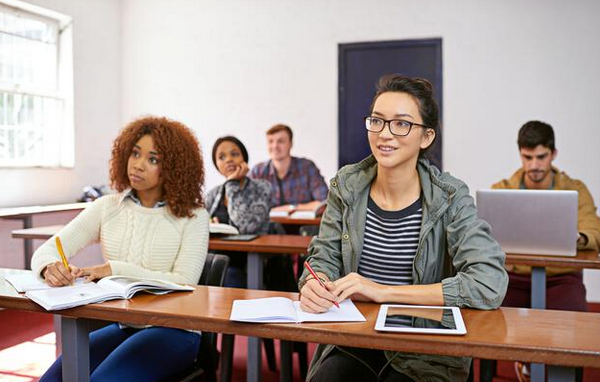